<a href="https://colab.research.google.com/github/MOHAN-DATTA-24/Machine_Learning_G/blob/main/Support_Vector_Regression_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Data Processing**

In [6]:
data = data.dropna()
print("Shape of the data: ",data.shape)

Shape of the data:  (1338, 7)


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##**FEATURE ENGINEERING**

In [73]:
Male = pd.get_dummies(data['sex'], drop_first=True)
Male = Male.astype(int)

data = pd.concat([data,Male],axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [74]:
Smoker = pd.get_dummies(data['smoker'],drop_first = True)
Smoker = Smoker.astype(int)
data = pd.concat([data,Smoker],axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [75]:
data = data.rename(columns = {'yes':'Smoker'})
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [76]:
Region = pd.get_dummies(data['region'],drop_first = True)
Region = Region.astype(int)
data = pd.concat([data,Region],axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


##**Exploratory Analysis**

In [28]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

#Distribution of "Sex" Parameter

<ipython-input-43-9baf770b8943>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'sex',data = data,palette = 'GnBu')


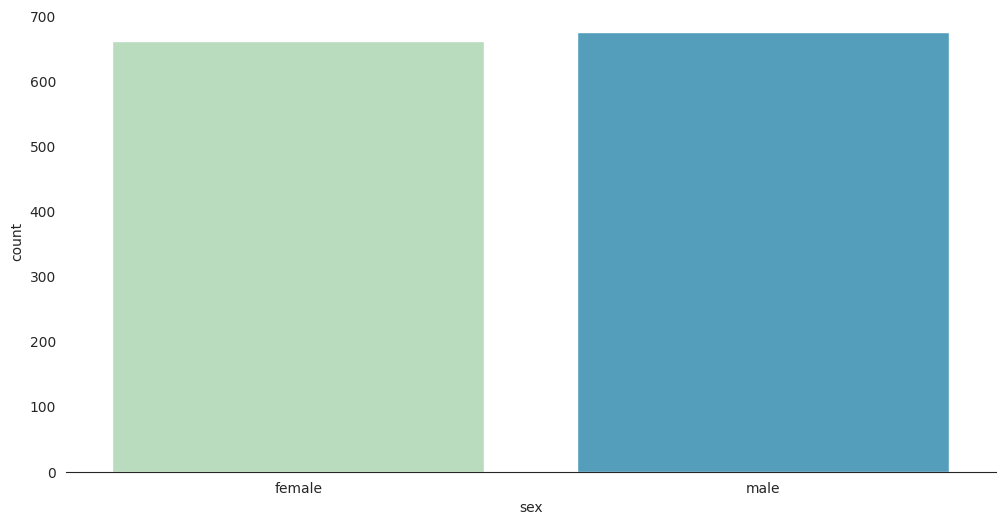

In [43]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.countplot(x = 'sex',data = data,palette = 'GnBu')
sns.despine(left = True)

## Relation of Smoking and gender to Charges

<ipython-input-46-f5b58f3e5d08>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'sex',y='charges',data = data,palette = 'GnBu')


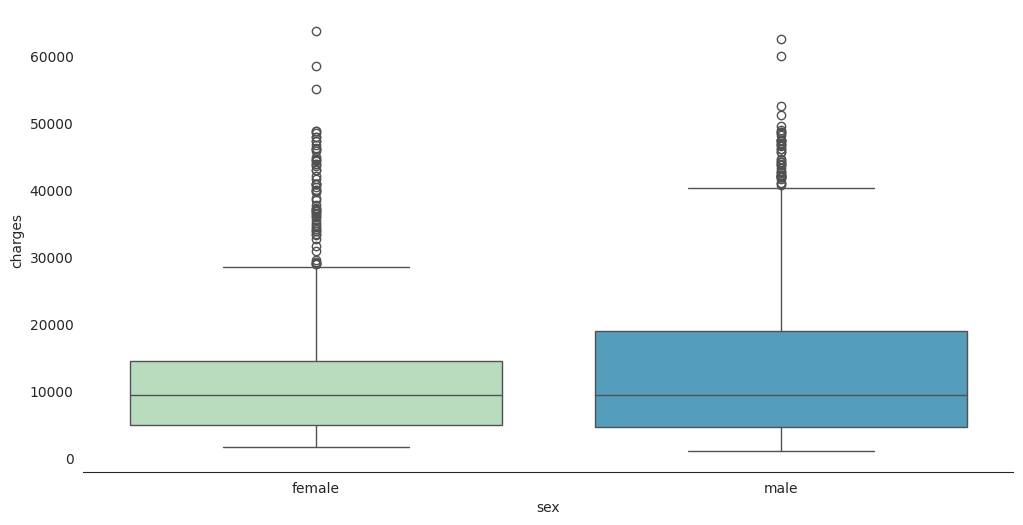

In [46]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.boxplot(x = 'sex',y='charges',data = data,palette = 'GnBu')
sns.despine(left = True)

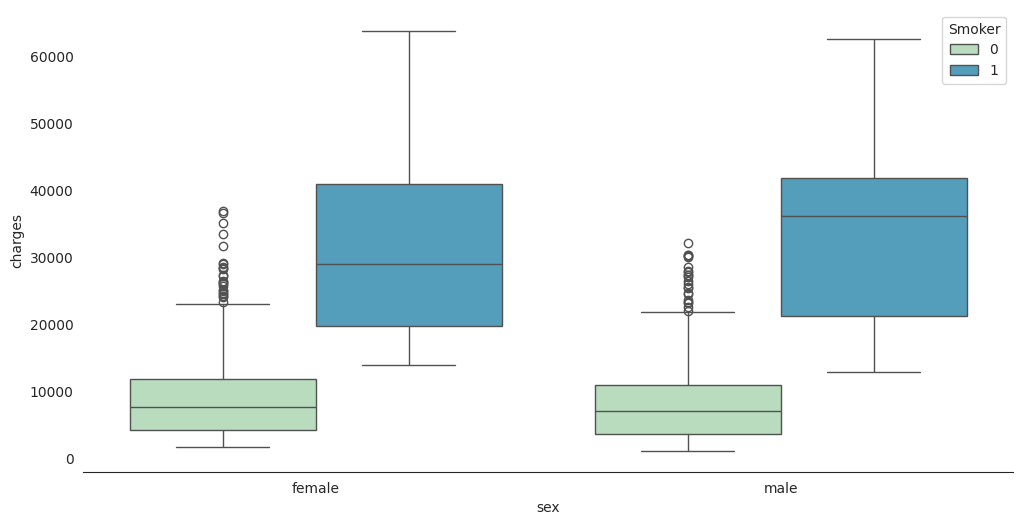

In [47]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.boxplot(x = 'sex',y='charges',data = data,palette = 'GnBu',hue = 'Smoker')
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

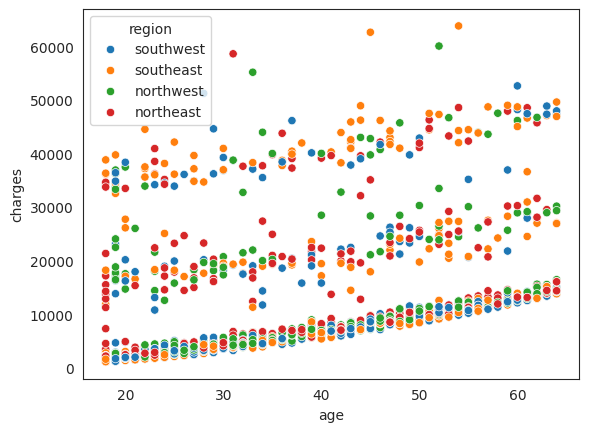

In [50]:
sns.scatterplot(x='age',y='charges',data = data,hue='region')

<Axes: xlabel='age', ylabel='charges'>

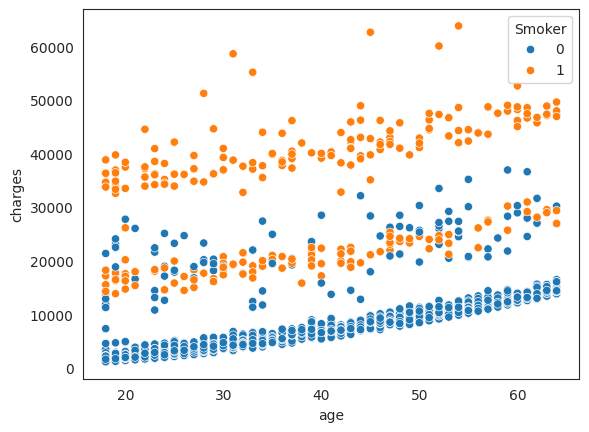

In [49]:
sns.scatterplot(x='age',y='charges',data = data,hue='Smoker')

<Axes: xlabel='bmi', ylabel='charges'>

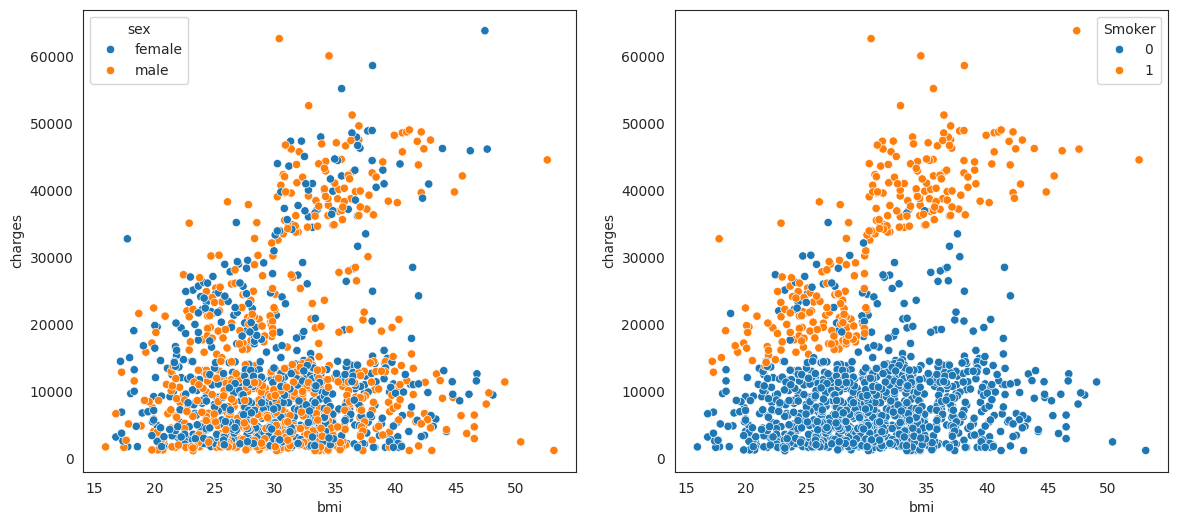

In [54]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6))
sns.scatterplot(x='bmi',y='charges',data = data,hue='sex',ax = ax[0])
sns.scatterplot(x='bmi',y='charges',data = data,hue='Smoker',ax = ax[1])

In [55]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [77]:
data.drop(['sex','smoker','region'],axis = 1,inplace=True)

In [78]:
data.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<Axes: >

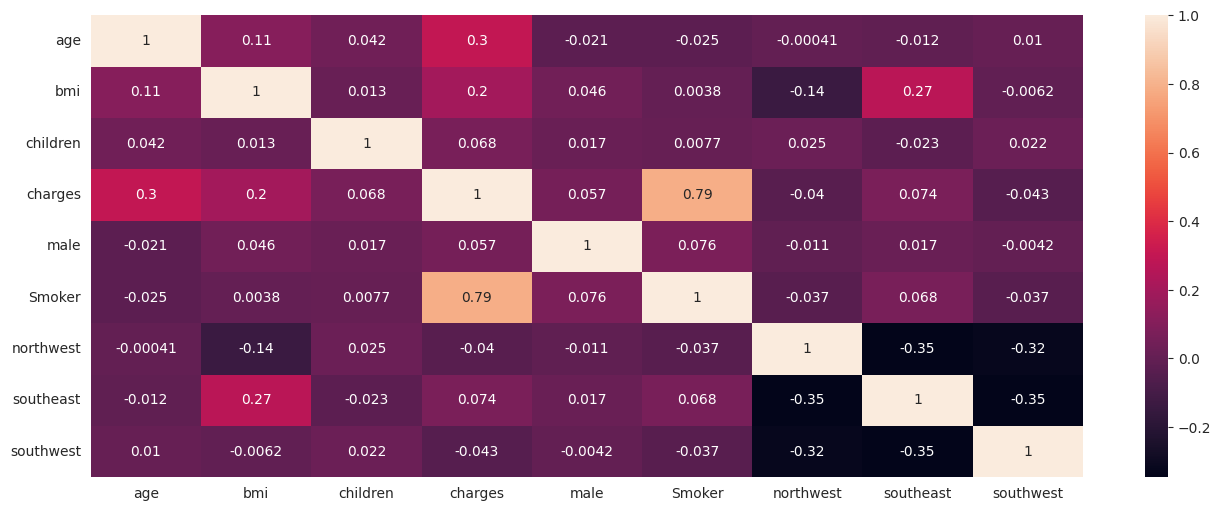

In [60]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot=True)

In [61]:
data.corr()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
Smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


#**Splitting data**

In [79]:
# Input
x = data.drop('charges',axis = 1)

# Output
y = data['charges']


<h3><b>Training</b></h3>




In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [81]:
print(f"training data shape = {x_train.shape}")
print(f"validation data shape = {x_test.shape}")
print(f"training data target shape = {y_train.shape}")
print(f"validation data target shape = {y_test.shape}")

training data shape = (802, 8)
validation data shape = (536, 8)
training data target shape = (802,)
validation data target shape = (536,)


In [82]:
data.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


#**Scaling the data**

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [84]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

## **<font color = "green">Support Vector Regression</font>**



In [85]:
from sklearn.svm import SVR

In [93]:
regressor0 = SVR(kernel = 'linear')
regressor0.fit(scaled_x_train,y_train)

regressor1 = SVR(kernel = 'rbf')
regressor1.fit(scaled_x_train,y_train)

regressor2 = SVR(kernel = 'sigmoid')
regressor2.fit(scaled_x_train,y_train)

regressor3 = SVR(kernel = 'poly')
regressor3.fit(scaled_x_train,y_train)

SVR(kernel='poly')

In [94]:
predict0 = regressor0.predict(scaled_x_test)
predict1 = regressor1.predict(scaled_x_test)
predict2 = regressor2.predict(scaled_x_test)
predict3 = regressor3.predict(scaled_x_test)

In [90]:
predict[:10]

array([9293.12980318, 9277.36753383, 9235.070944  , 9290.12701729,
       9259.08744192, 9275.85374197, 9273.83723488, 9311.18686192,
       9276.68440135, 9264.83742314])

In [92]:
y_test[:10]

315      9722.76950
622      9182.17000
282      4237.12655
1213    10806.83900
187      5325.65100
1131     3693.42800
1057    17929.30337
465     19521.96820
383      5846.91760
767      7050.64200
Name: charges, dtype: float64

In [95]:
print(np.mean((y_test - predict0)**2))
print(np.mean((y_test - predict1)**2))
print(np.mean((y_test - predict2)**2))
print(np.mean((y_test - predict3)**2))

165776668.7785188
175592395.86889657
174967791.29983953
175348336.48438382


In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6))
sns.scatterplot(x='bmi',y='charges',data = data,hue='sex',ax = ax[0])
sns.scatterplot(x='bmi',y='charges',data = data,hue='Smoker',ax = ax[1])

Text(0.5, 0, 'Predict')

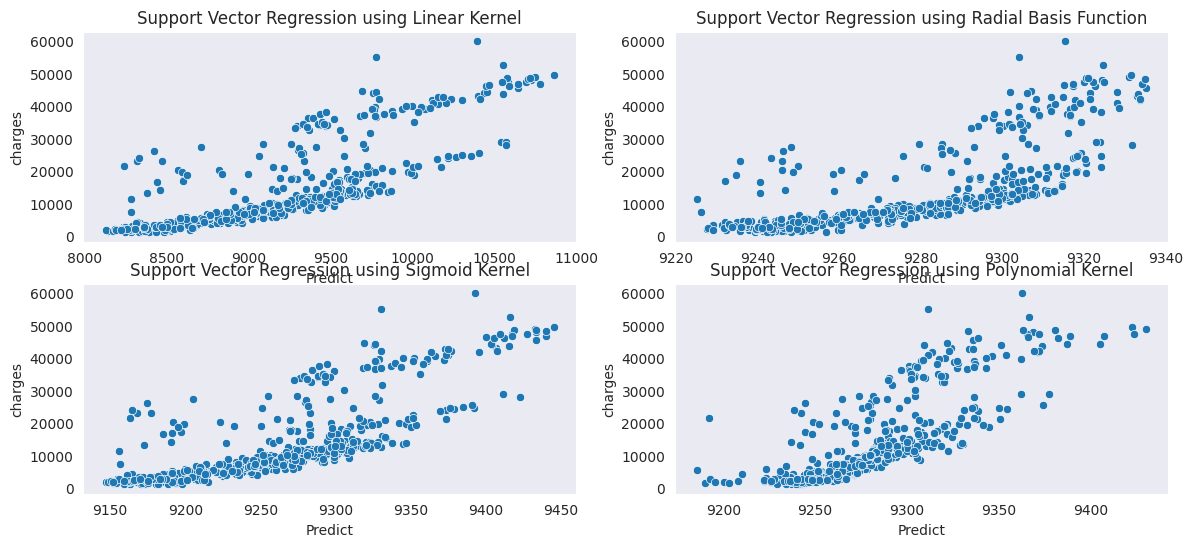

In [106]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
sns.set_style('dark')

f0 = sns.scatterplot(x=predict0, y=y_test, ax=ax[0][0])
f0.set_title('Support Vector Regression using Linear Kernel')
f0.set_xlabel('Predict')

f1 = sns.scatterplot(x=predict1, y=y_test, ax=ax[0][1])
f1.set_title('Support Vector Regression using Radial Basis Function')
f1.set_xlabel('Predict')

f2 = sns.scatterplot(x=predict2, y=y_test, ax=ax[1][0])
f2.set_title('Support Vector Regression using Sigmoid Kernel')
f2.set_xlabel('Predict')

f3 = sns.scatterplot(x=predict3, y=y_test, ax=ax[1][1])
f3.set_title('Support Vector Regression using Polynomial Kernel')
f3.set_xlabel('Predict')


Index(['Actual', 'Model', 'Value'], dtype='object')


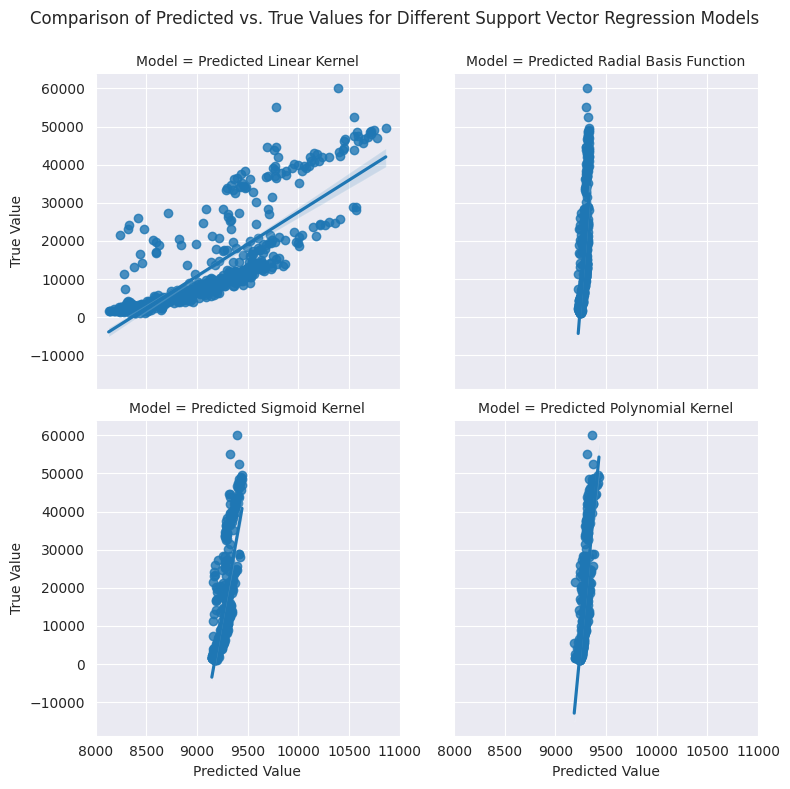

In [123]:
# Combine predicted values and true values into a DataFrame
results = pd.DataFrame({'Predicted Linear Kernel': predict0,
                        'Predicted Radial Basis Function': predict1,
                        'Predicted Sigmoid Kernel': predict2,
                        'Predicted Polynomial Kernel': predict3,
                        'Actual': y_test})

# Melt the DataFrame to have a single column for predicted and true values
results = results.melt(id_vars='Actual', var_name='Model', value_name='Value')

print(results.columns)

# Plot using Seaborn's lmplot
sns.set_style('darkgrid')
g = sns.lmplot(x='Value', y='Actual', col='Model', data=results, col_wrap=2, height=4)
g.set_axis_labels('Predicted Value', 'True Value')
plt.subplots_adjust(top=0.9)  # Adjust the subplot layout to make room for the title
g.fig.suptitle('Comparison of Predicted vs. True Values for Different Support Vector Regression Models')
plt.show()